In [54]:
import pandas as pd
import pandas_ta as pta
import matplotlib.pyplot as plt
import glob
from scipy.stats import norm

import numpy as np

In [38]:
for f in glob.glob("data/nifty_index_dataD*.csv"):
    if "vix" not in f:
        print("#####################################")
        print(f)
        
        data = pd.read_csv(f,index_col="datetime")
        print("SHAPE: ",data.shape)
        data["sma200"] =pta.sma(data["low"],length=200)
        data["sma50"] =pta.sma(data["close"],length=50)
        data["ema200"] =pta.ema(data["close"],length=200)
        data["ema50"] =pta.ema(data["close"],length=50)
        data["sma20"] =pta.sma(data["close"],length=20)
        data["ema20"] =pta.ema(data["close"],length=20)


        data.dropna(inplace=True)
        print("ABOVE SMA200 {:.2f}".format((data["sma200"]<=data["close"]).sum()/data.shape[0]))
        print("ABOVE SMA50 {:.2f}".format((data["sma50"]<=data["close"]).sum()/data.shape[0]))
        print("ABOVE EMA200 {:.2f}".format((data["ema200"]<=data["close"]).sum()/data.shape[0]))
        print("ABOVE EMA50 {:.2f}".format((data["ema50"]<=data["close"]).sum()/data.shape[0]))

        print("ABOVE SMA20 {:.2f}".format((data["sma20"]<=data["close"]).sum()/data.shape[0]))
        print("ABOVE EMA20 {:.2f}".format((data["ema20"]<=data["close"]).sum()/data.shape[0]))



#####################################
data/nifty_index_dataD.csv
SHAPE:  (7917, 6)
ABOVE SMA200 0.68
ABOVE SMA50 0.60
ABOVE EMA200 0.68
ABOVE EMA50 0.61
ABOVE SMA20 0.58
ABOVE EMA20 0.59


In [46]:
data.tail()

,symbol,open,high,low,close,volume,sma200,sma50,ema200,ema50,sma20,ema20,closePrev
datetime,,,,,,,,,,,,,
2023-04-06 09:15:00,NSE:NIFTY,17533.850,17638.699,17502.850,17599.150,242708337.0,17416.082215,17522.42900,17515.427322,17482.839809,17210.70765,17293.770707,17624.051
2023-04-10 09:15:00,NSE:NIFTY,17634.900,17694.100,17597.949,17624.051,254819382.0,17428.154960,17512.53900,17516.508154,17488.377503,17204.19020,17325.225973,17722.301
2023-04-11 09:15:00,NSE:NIFTY,17704.801,17748.750,17655.150,17722.301,304263454.0,17440.475210,17504.61900,17518.555844,17497.550974,17210.82525,17363.042642,17812.400
2023-04-12 09:15:00,NSE:NIFTY,17759.551,17825.750,17717.250,17812.400,232816318.0,17451.962210,17503.02802,17521.479667,17509.897994,17230.80025,17405.838581,17828.000
2023-04-13 09:15:00,NSE:NIFTY,17807.301,17842.150,17729.650,17828.000,285764798.0,17463.680710,17507.50102,17524.529620,17522.372583,17264.48520,17446.044430,NaN


In [65]:
spot = 17828
confidence_level = .95
intial_investment = 1000000

daily_n_std = data["close"].pct_change().std()
daily_n_mean = data["close"].pct_change().mean()
print(daily_n_mean,daily_n_std)

#annual vol

annu_n_std = daily_n_std*np.sqrt(252)
print(annu_n_std)

sd1_upper = daily_n_mean+1*daily_n_std
sd1_lower = daily_n_mean-1*daily_n_std

sd2_upper = daily_n_mean+2*daily_n_std
sd2_lower = daily_n_mean-2*daily_n_std

print((1+sd1_lower)*spot,(1+sd1_upper)*spot)
print((1+sd2_lower)*spot,(1+sd2_upper)*spot)

######## z score #############
z_score_cut_off = norm.ppf(1-confidence_level,0,1)
print("z_score_cut_off",z_score_cut_off)
print("VaR:  {:.2f}".format(z_score_cut_off*intial_investment*annu_n_std))


0.0006017320675869852 0.01560122849655799
0.24766182449391932
17560.588977664305 18116.866380937576
17282.45027602767 18395.005082574215
z_score_cut_off -1.6448536269514722
VaR:  -407367.45


In [79]:
data2 =data.tail(272)
data2["logret"] = np.log(data2["close"]/data2["close"].shift(1))

/tmp/ipykernel_1263/390388411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["logret"] = np.log(data2["close"]/data2["close"].shift(1))


In [83]:
stddev = data2["logret"].std()
print(stddev)

spot-(spot*stddev*np.sqrt(15)) ,spot+(spot*stddev*np.sqrt(15))

0.009355006489036567


(17182.059748863125, 18473.940251136875)

## NIFTY STD DEV CALCULATION with IV

In [93]:
days_to_exp =13
iv =11.8
rangen = spot*(iv/100)*np.sqrt(days_to_exp/365)
spot-rangen, spot+rangen

(17430.982293086618, 18225.017706913382)

#############################

In [40]:
data["closePrev"] = data["close"].shift(-1)

In [30]:
(data["close"]>data["closePrev"]).sum()/data["close"].shape[0]

0.4735004108463435

In [9]:
data['bnh_returns'] = np.log(data['close']/data["close"].shift(1))

data["signal"] = np.where(data["close"]>data["sma200"],1,-1)
# data["signal"] = np.where(data["close"]>data["sma200"],-1,data["signal"])
data['position'] = data['signal'].replace(to_replace=0, method='ffill')
data['position'] = data['position'].shift(1)

# calculating stretegy returns
data['strategy_returns'] = data['bnh_returns'] * (data['position'])


Buy and hold returns: 0.8590854207674918
Strategy returns: 0.6897276090347957


<Axes: xlabel='datetime'>

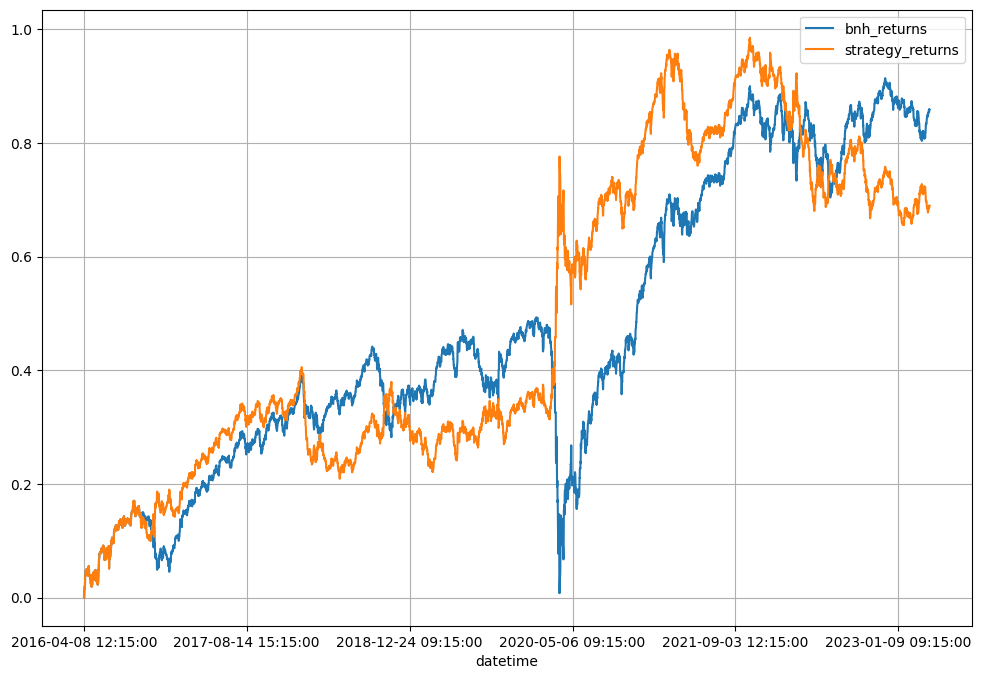

In [10]:
print("Buy and hold returns:",data['bnh_returns'].cumsum()[-1])
print("Strategy returns:",data['strategy_returns'].cumsum()[-1])

# plotting strategy historical performance over time
data[['bnh_returns','strategy_returns']] = data[['bnh_returns','strategy_returns']].cumsum()
data[['bnh_returns','strategy_returns']].plot(grid=True, figsize=(12, 8))

In [ ]:
plt.plot(data["close"].values)
plt.plot(data["sma200"].values)

In [ ]:
data